In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from tqdm import tqdm
import librosa as lb
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=UserWarning)

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
scoring = 'r2'

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Helper Functions

In [ ]:
# function to add month column 
def add_col_month(df):
  """
  Input: DataFrame
  Output: DataFrame with month column added
  """

  df=df.iloc[:-2,:]
  df['MONTH']=-1
  i=0
  for month in range(1,13):
    if month<=7:
      if (month%2==0) and (month!=2):
        for days in range(1,31):
          df['MONTH'][i]=month
          i+=1
      elif month == 2:
        for days in range(1,29):
          df['MONTH'][i]=month
          i+=1
      else:
        for days in range(1,32):
          df['MONTH'][i]=month
          i+=1
    else:
      if month%2==0:
        for days in range(1,32):
          df['MONTH'][i]=month
          i+=1
      else:
        for days in range(1,31):
          df['MONTH'][i]=month
          i+=1

  i=365
  for month in range(1,13):
    if month<=7:
      if (month%2==0) and (month!=2):
        for days in range(1,31):
          df['MONTH'][i]=month
          i+=1
      elif month == 2:
        for days in range(1,30):
          df['MONTH'][i]=month
          i+=1
      else:
        for days in range(1,32):
          df['MONTH'][i]=month
          i+=1
    else:
      if month%2==0:
        for days in range(1,32):
          df['MONTH'][i]=month
          i+=1
      else:
        for days in range(1,31):
          df['MONTH'][i]=month
          i+=1
    
  for days in range(731,731+31):
    df['MONTH'][days]=1
  for days in range(762,762+28):
    df['MONTH'][days]=2
  for days in range(790,790+31):
    df['MONTH'][days]=3
  for days in range(821,821+30):
    df['MONTH'][days]=4
  for days in range(851,851+31):
    df['MONTH'][days]=5
  for days in range(882,904):
    df['MONTH'][days]=6
  return df

# Model

In [ ]:
#f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11 = merged csv files of dashboard data and collected data

f1=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/final /f1.csv')
f2=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/final /f2.csv')
f3=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/final /f3.csv')
f4=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/final /f4.csv')
f5=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/final /f5.csv')
f6=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/final /f6.csv')
f7=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/final /f7.csv')
f8=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/final /f8.csv')
f9=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/final /f9.csv')
f10=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/final /f10.csv')
f11=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/final /f11.csv')

f1.drop(['Unnamed: 0'],axis=1,inplace=True)
f2.drop(['Unnamed: 0'],axis=1,inplace=True)
f3.drop(['Unnamed: 0'],axis=1,inplace=True)
f4.drop(['Unnamed: 0'],axis=1,inplace=True)
f5.drop(['Unnamed: 0'],axis=1,inplace=True)
f6.drop(['Unnamed: 0'],axis=1,inplace=True)
f7.drop(['Unnamed: 0'],axis=1,inplace=True)
f8.drop(['Unnamed: 0'],axis=1,inplace=True)
f9.drop(['Unnamed: 0'],axis=1,inplace=True)
f10.drop(['Unnamed: 0'],axis=1,inplace=True)
f11.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
columns=['LAT','LON','YEAR','DOY','PRECTOT','WS2M','RH2M','T2M_RANGE','MONTH','measurement']
train=pd.DataFrame(columns=columns)
val=pd.DataFrame(columns=columns)

train=train.append(f1.iloc[:20,:],ignore_index=True)
train=train.append(f2.iloc[:20,:],ignore_index=True)
train=train.append(f3.iloc[:20,:],ignore_index=True)
train=train.append(f4.iloc[:20,:],ignore_index=True)
train=train.append(f5.iloc[:20,:],ignore_index=True)
train=train.append(f6.iloc[:20,:],ignore_index=True)
train=train.append(f7.iloc[:20,:],ignore_index=True)
train=train.append(f8.iloc[:20,:],ignore_index=True)
train=train.append(f9.iloc[:20,:],ignore_index=True)
train=train.append(f10.iloc[:20,:],ignore_index=True)
train=train.append(f11.iloc[:20,:],ignore_index=True)

val=val.append(f1.iloc[20:,:],ignore_index=True)
val=val.append(f1.iloc[20:,:],ignore_index=True)
val=val.append(f1.iloc[20:,:],ignore_index=True)
val=val.append(f1.iloc[20:,:],ignore_index=True)
val=val.append(f1.iloc[20:,:],ignore_index=True)
val=val.append(f1.iloc[20:,:],ignore_index=True)
val=val.append(f1.iloc[20:,:],ignore_index=True)
val=val.append(f1.iloc[20:,:],ignore_index=True)
val=val.append(f1.iloc[20:,:],ignore_index=True)
val=val.append(f1.iloc[20:,:],ignore_index=True)
val=val.append(f1.iloc[20:,:],ignore_index=True)

In [ ]:
x_train=train.loc[:,['LAT','LON','YEAR','DOY','PRECTOT','WS2M','RH2M','T2M_RANGE','MONTH']].values
x_val=val.loc[:,['LAT','LON','YEAR','DOY','PRECTOT','WS2M','RH2M','T2M_RANGE','MONTH']].values
y_train=train.loc[:,'measurement'].values
y_val=val.loc[:,'measurement'].values

In [ ]:
def regression_report(y_true, y_pred):
  print('Mean Absolute Error    : ',mean_absolute_error(y_true, y_pred))
  print('Mean Squared Error     : ',mean_squared_error(y_true, y_pred))
  print('Root Mean Squared Error: ',math.sqrt(mean_squared_error(y_true, y_pred)))
  print('R-Squared              : ',r2_score(y_true, y_pred))

def regression(x_train, y_train, x_val, y_val):
  #linear regression
  reg1= LinearRegression()
  print("                       Linear Regression")
  reg1.fit(x_train,y_train)
  test_pred=reg1.predict(x_val)
  print('Regression Report - Validation: ')
  regression_report(y_val, test_pred)
  print('\n')

  #Random Forest Regression
  reg2= RandomForestRegressor(n_estimators=100)
  print("                       Random Forest Regression: ")
  reg2.fit(x_train,y_train)
  test_pred=reg2.predict(x_val)
  print('Regression Report - Validation: ')
  regression_report(y_val, test_pred)
  print('\n')

  #XGBoost Regression
  reg3= XGBRegressor(verbosity = 0)
  print("                       XGBoost Regression: ")
  reg3.fit(x_train,y_train)
  test_pred=reg3.predict(x_val)
  print('Regression Report - Validation: ')
  print(regression_report(y_val, test_pred))
  print("\n")

  #AdaBoost Regression
  reg4= AdaBoostRegressor(n_estimators=100)
  print("                       AdaBoost Regression: ")
  reg4.fit(x_train,y_train)
  test_pred=reg4.predict(x_val)
  print('Regression Report - Validation: ')
  regression_report(y_val, test_pred)
  print("\n")

  #KNeighbors Regression
  reg5= KNeighborsRegressor()
  print("                       KNeighbors Regression: ")
  reg5.fit(x_train,y_train)
  test_pred=reg5.predict(x_val)
  print('Regression Report - Validation: ')
  regression_report(y_val, test_pred)
  print("\n")

  #Decision Tree Regression
  reg6= DecisionTreeRegressor()
  print("                       Decision Tree Regression: ")
  reg6.fit(x_train,y_train)
  test_pred=reg6.predict(x_val)
  print('Regression Report - Validation: ')
  regression_report(y_val, test_pred)
  print("\n")

In [ ]:
regression(x_train, y_train, x_val, y_val)

                       Linear Regression
Regression Report - Validation: 
Mean Absolute Error    :  14.752588550474291
Mean Squared Error     :  307.54928037289926
Root Mean Squared Error:  17.53708300638676
R-Squared              :  -248.22451358189778


                       Random Forest Regression: 
Regression Report - Validation: 
Mean Absolute Error    :  12.100324999999941
Mean Squared Error     :  186.1743595524987
Root Mean Squared Error:  13.644572530955255
R-Squared              :  -149.8675752537428


                       XGBoost Regression: 
Regression Report - Validation: 
Mean Absolute Error    :  8.960468978881837
Mean Squared Error     :  123.88740476816325
Root Mean Squared Error:  11.130471902312285
R-Squared              :  -99.39294566006696
None


                       AdaBoost Regression: 
Regression Report - Validation: 
Mean Absolute Error    :  19.178929660278733
Mean Squared Error     :  371.3856711874731
Root Mean Squared Error:  19.271369208944993
R-Squ

In [ ]:
test1=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/indicators/1 2019-2021.csv')
test2=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/indicators/2 2019-2021.csv')
test3=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/indicators/3 2019-2021.csv')
test4=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/indicators/4 2019-2021.csv')
test5=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/indicators/5 2019-2021.csv')
test6=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/indicators/6 2019-2021.csv')
test7=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/indicators/7 2019-2021.csv')
test8=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/indicators/8 2019-2021.csv')
test9=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/indicators/9 2019-2021.csv')
test10=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/indicators/10 2019-2021.csv')
test11=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/indicators/11 2019-2021.csv')

test1=add_col_month(test1)
test2=add_col_month(test2)
test3=add_col_month(test3)
test4=add_col_month(test4)
test5=add_col_month(test5)
test6=add_col_month(test6)
test7=add_col_month(test7)
test8=add_col_month(test8)
test9=add_col_month(test9)
test10=add_col_month(test10)
test11=add_col_month(test11)

test1=test1.iloc[871:,:].values
test2=test2.iloc[871:,:].values
test3=test3.iloc[871:,:].values
test4=test4.iloc[871:,:].values
test5=test5.iloc[871:,:].values
test6=test6.iloc[871:,:].values
test7=test7.iloc[871:,:].values
test8=test8.iloc[871:,:].values
test9=test9.iloc[871:,:].values
test10=test10.iloc[871:,:].values
test11=test11.iloc[871:,:].values

In [ ]:
#final chosen regressor
reg=XGBRegressor(n_estimators=250,verbosity = 0)
reg.fit(x_train,y_train)
y_pred=reg.predict(x_val)
print('Mean Absolute Error    : ',mean_absolute_error(y_val, y_pred))
print('Mean Squared Error     : ',mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error: ',math.sqrt(mean_squared_error(y_val, y_pred)))
print('R-Squared              : ',r2_score(y_val, y_pred))

Mean Absolute Error    :  6.012043685913088
Mean Squared Error     :  52.19363737127405
Root Mean Squared Error:  7.224516410893815
R-Squared              :  -41.29544569297576


# Prediction

# Comunidad Foral De Navarra 

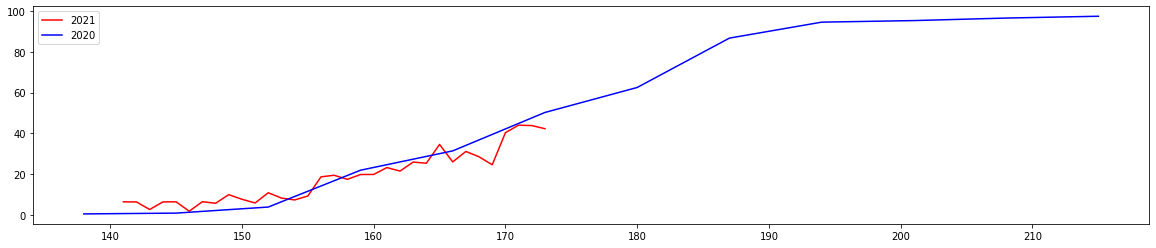

In [ ]:
pred_test1=reg.predict(test1)

harvested_parcels=pd.read_csv("/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/harvested parcels/Comunidad Foral de Navarra_2021-06-23_ES22a-E10a6.csv")
y=[138,145,152,159,166,173,180,187,194,201,208,215]
x=list(harvested_parcels['measurement'])
test1=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/indicators/1 2019-2021.csv')
test1=add_col_month(test1)
test1=test1.iloc[871:,:]
a=test1['DOY']
b=pred_test1

fig, ax = plt.subplots(figsize=(20,4))
ax.plot(a,b,color='red',label='2021')
ax.plot(y,x,color='blue',label='2020')
ax.plot()
plt.legend()

# La Rioja

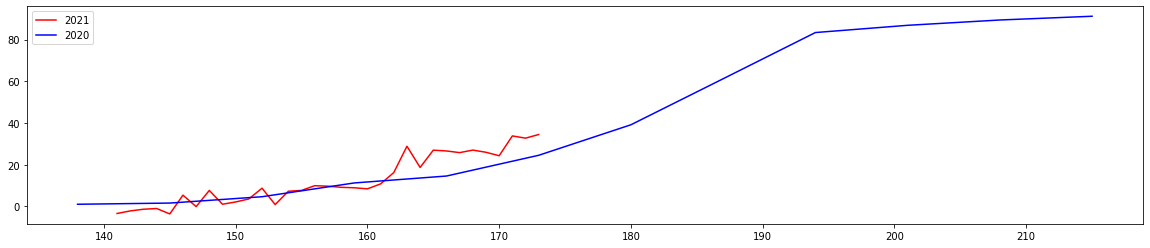

In [ ]:
pred_test2=reg.predict(test2)

harvested_parcels=pd.read_csv("/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/harvested parcels/La Rioja_2021-06-23_ES23a-E10a6.csv")
y=[138,145,152,159,166,173,180,187,194,201,208,215]
x=list(harvested_parcels['measurement'])

test2=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/indicators/2 2019-2021.csv')
test2=add_col_month(test2)
test2=test2.iloc[871:,:]
a=test2['DOY']
b=pred_test2

fig, ax = plt.subplots(figsize=(20,4))
ax.plot(a,b,color='red',label='2021')
ax.plot(y,x,color='blue',label='2020')
plt.legend()

# Aragon

In [ ]:
pred_test3=reg.predict(test3)

harvested_parcels=pd.read_csv("/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/harvested parcels/Aragon_2021-06-23_ES24a-E10a6.csv")
y=[138,145,152,159,166,173,180,187,194,201,208,215]
x=list(harvested_parcels['measurement'])

test3=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/indicators/3 2019-2021.csv')
test3=add_col_month(test3)
test3=test3.iloc[871:,:]
a=test3['DOY']
b=pred_test3

fig, ax = plt.subplots(figsize=(20,4))
ax.plot(a,b,color='pink',label='2021')
ax.plot(y,x,color='yellow',label='2020')
plt.legend()

# Comunidad De Madrid

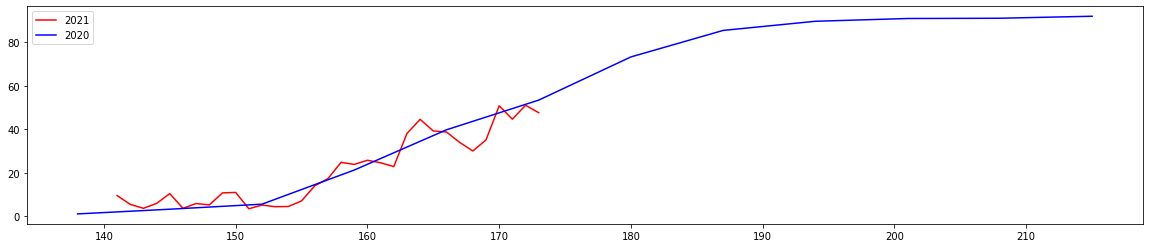

In [ ]:
pred_test4=reg.predict(test4)

harvested_parcels=pd.read_csv("/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon//harvested parcels/Comunidad de Madrid_2021-06-23_ES30a-E10a6.csv")
y=[138,145,152,159,166,173,180,187,194,201,208,215]
x=list(harvested_parcels['measurement'])

test4=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/indicators/4 2019-2021.csv')
test4=add_col_month(test4)
test4=test4.iloc[871:,:]
a=test4['DOY']
b=pred_test4

fig, ax = plt.subplots(figsize=(20,4))
ax.plot(a,b,color='red',label='2021')
ax.plot(y,x,color='blue',label='2020')
plt.legend()

# Castilla y Leon

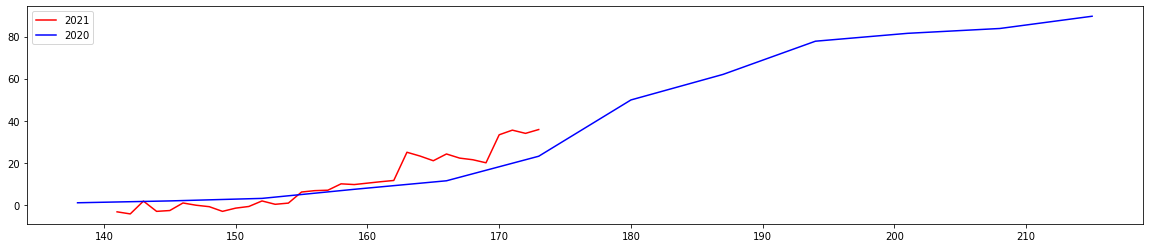

In [ ]:
pred_test5=reg.predict(test5)

harvested_parcels=pd.read_csv("/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/harvested parcels/Castilla y Leon_2021-06-23_ES41a-E10a6.csv")
y=[138,145,152,159,166,173,180,187,194,201,208,215]
x=list(harvested_parcels['measurement'])

test5=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/indicators/5 2019-2021.csv')
test5=add_col_month(test5)
test5=test5.iloc[871:,:]
a=test5['DOY']
b=pred_test5

fig, ax = plt.subplots(figsize=(20,4))
ax.plot(a,b,color='red',label='2021')
ax.plot(y,x,color='blue',label='2020')
plt.legend()

# Castilla La Mancha

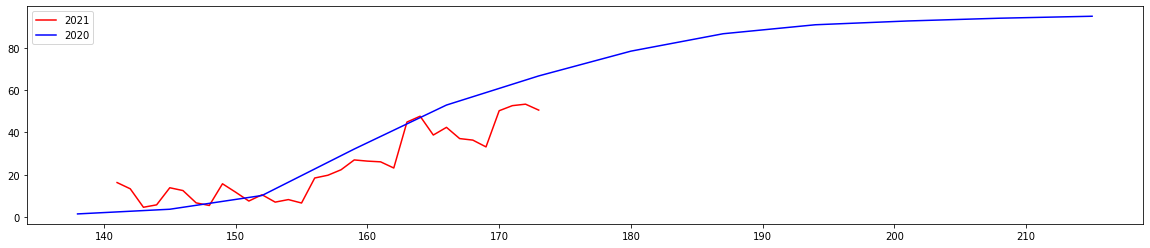

In [ ]:
pred_test6=reg.predict(test6)

harvested_parcels=pd.read_csv("/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/harvested parcels/Castilla-La Mancha_2021-06-23_ES42a-E10a6.csv")
y=[138,145,152,159,166,173,180,187,194,201,208,215]
x=list(harvested_parcels['measurement'])

test6=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/indicators/6 2019-2021.csv')
test6=add_col_month(test6)
test6=test6.iloc[871:,:]
a=test6['DOY']
b=pred_test6

fig, ax = plt.subplots(figsize=(20,4))
ax.plot(a,b,color='red',label='2021')
ax.plot(y,x,color='blue',label='2020')
plt.legend()

# Extremadura

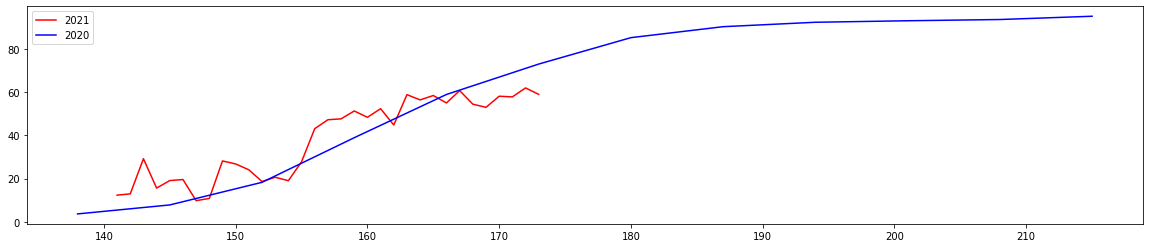

In [ ]:
pred_test7=reg.predict(test7)

harvested_parcels=pd.read_csv("/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/harvested parcels/Extremadura_2021-06-23_ES43a-E10a6.csv")
y=[138,145,152,159,166,173,180,187,194,201,208,215]
x=list(harvested_parcels['measurement'])

test7=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/indicators/7 2019-2021.csv')
test7=add_col_month(test7)
test7=test7.iloc[871:,:]
a=test7['DOY']
b=pred_test7

fig, ax = plt.subplots(figsize=(20,4))
ax.plot(a,b,color='red',label='2021')
ax.plot(y,x,color='blue',label='2020')
plt.legend()

# Cataluna

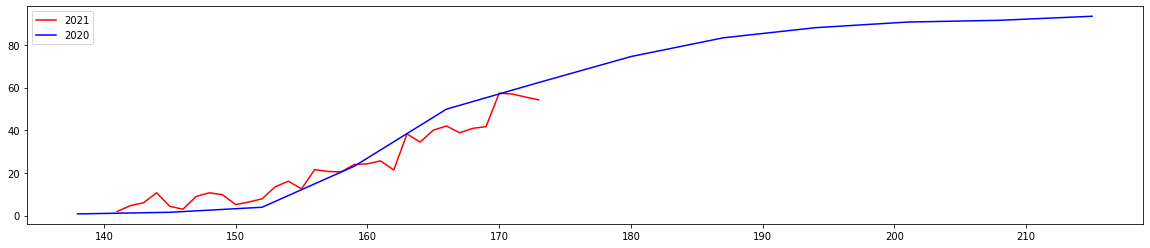

In [ ]:
pred_test8=reg.predict(test8)

harvested_parcels=pd.read_csv("/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/harvested parcels/Cataluna_2021-06-23_ES51a-E10a6.csv")
y=[138,145,152,159,166,173,180,187,194,201,208,215]
x=list(harvested_parcels['measurement'])

test8=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/indicators/8 2019-2021.csv')
test8=add_col_month(test8)
test8=test8.iloc[871:,:]
a=test8['DOY']
b=pred_test8

fig, ax = plt.subplots(figsize=(20,4))
ax.plot(a,b,color='red',label='2021')
ax.plot(y,x,color='blue',label='2020')
plt.legend()

# Comunidad Valenciana

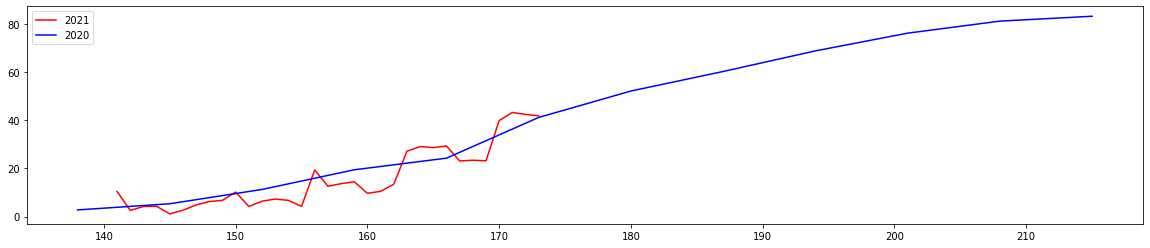

In [ ]:
pred_test9=reg.predict(test9)

harvested_parcels=pd.read_csv("/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/harvested parcels/Comunidad Valenciana_2021-06-23_ES52a-E10a6.csv")
y=[138,145,152,159,166,173,180,187,194,201,208,215]
x=list(harvested_parcels['measurement'])

test9=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/indicators/9 2019-2021.csv')
test9=add_col_month(test9)
test9=test9.iloc[871:,:]
a=test9['DOY']
b=pred_test9

fig, ax = plt.subplots(figsize=(20,4))
ax.plot(a,b,color='red',label='2021')
ax.plot(y,x,color='blue',label='2020')
plt.legend()

# Andalucia

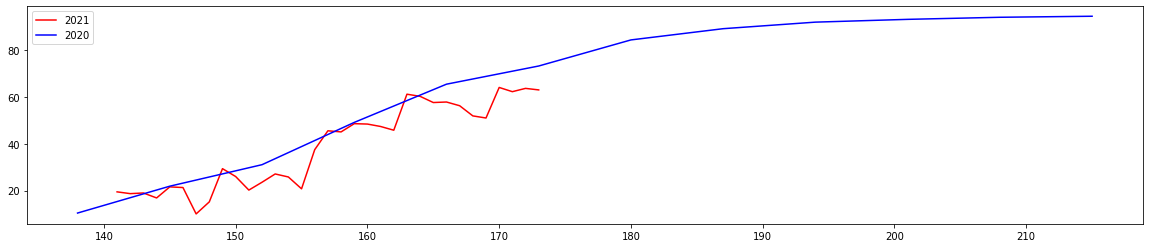

In [ ]:
pred_test10=reg.predict(test10)

harvested_parcels=pd.read_csv("/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/harvested parcels/Andalucia_2021-06-23_ES61a-E10a6.csv")
y=[138,145,152,159,166,173,180,187,194,201,208,215]
x=list(harvested_parcels['measurement'])

test10=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/indicators/10 2019-2021.csv')
test10=add_col_month(test10)
test10=test10.iloc[871:,:]
a=test10['DOY']
b=pred_test10

fig, ax = plt.subplots(figsize=(20,4))
ax.plot(a,b,color='red',label='2021')
ax.plot(y,x,color='blue',label='2020')
plt.legend()

# Region de Murcia

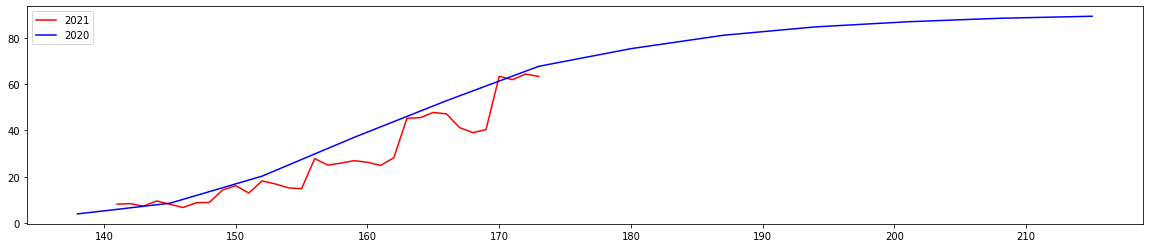

In [ ]:
pred_test11=reg.predict(test11)

harvested_parcels=pd.read_csv("/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/harvested parcels/Region de Murcia_2021-06-23_ES62a-E10a6.csv")
y=[138,145,152,159,166,173,180,187,194,201,208,215]
x=list(harvested_parcels['measurement'])

test11=pd.read_csv('/content/drive/MyDrive/RESEARCH/2/Dataset/EO Dashboard Hackathon/indicators/11 2019-2021.csv')
test11=add_col_month(test11)
test11=test11.iloc[871:,:]
a=test11['DOY']
b=pred_test11

fig, ax = plt.subplots(figsize=(20,4))
ax.plot(a,b,color='red',label='2021')
ax.plot(y,x,color='blue',label='2020')
plt.legend()